##What are two data analytic tasks you can perform to solve the problem? You should discuss one scenario for regression and one for classification. Note that the scenarios could be related to more than one dataset.
What is your dataset, and what is your training data? For every modelling task, identify your target variable and explain why it is appropriate for your objective and how its characteristics lead you to consider the models.

# Linear Regression

First I will consider a scenerio for regression to perform a predictive analytics. In this task I will train a linear regression model using the historical data of World Risk Index (WRI) data from 2011 to 2021. I will obtain the evaluation metrics to ensure that the model perform well on the predicted data and visualise the actual and predicted value to see the fifferences. In addition, I will obtain the model coefficients to identify important features in the data contributing to the World Risk Index Score. The Linear regression can also be used to predict the future WRI score.


## Why Linear regression?
Linear regression is suitable because the problem at hand is a regression problem where the target variable (WRI) is continuous. Linear regression assumes a linear relationship between the input features and the target variable, which is reasonable for this problem since the WRI values are expected to change gradually over time. Additionally, linear regression is a simple and interpretable model, making it easy to understand the relationship between the input features and the target variable.

## Scenario:

In this task, I aim to investigate the factors that contribute to high or low WRI scores for countries. The dataset contains several variables for each country, such as Exposure, Vulnerability, Susceptibility, Lack of Coping Capabilities, Lack of Adaptive Capacities, and WRI scores for each country.

I will then use linear regression to build a model that predicts the WRI score based on the other variables. Specifically, we can use multiple linear regression, which allows to model the relationship between the WRI score and multiple independent variables.

After fitting the linear regression model, I will analyze the coefficients to identify the most important predictors of the WRI score. I wll visualise each out put and provide interpretations under each charts.

In summary, linear regression is a useful tool for analyzing the World Risk Index data and gaining insights into the factors that contribute to disaster risk for countries around the world.

### Importing all neccessary libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

#### Loading the dataset
Using the pandas dataframe to import the dataset in csv format and printing the first few rows

In [ ]:
data = pd.read_csv("World_risk_index.csv")
data.head(5)

,Region,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year,Exposure Category,WRI Category,Vulnerability Category,Susceptibility Category
0,Vanuatu,32.00,56.33,56.81,37.14,79.34,53.96,2011,Very High,Very High,High,High
1,Tonga,29.08,56.04,51.90,28.94,81.80,44.97,2011,Very High,Very High,Medium,Medium
2,Philippinen,24.32,45.09,53.93,34.99,82.78,44.01,2011,Very High,Very High,High,High
3,Salomonen,23.51,36.40,64.60,44.11,85.95,63.74,2011,Very High,Very High,Very High,High
4,Guatemala,20.88,38.42,54.35,35.36,77.83,49.87,2011,Very High,Very High,High,High


Visualising the trends of average WRI values over the years.

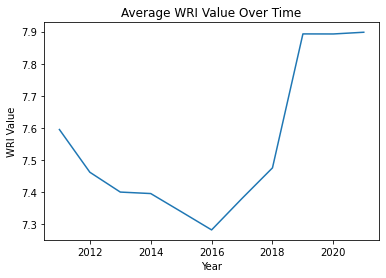

In [ ]:
data.groupby('Year')['WRI'].mean().plot()
plt.xlabel("Year")
plt.ylabel("WRI Value")
plt.title("Average WRI Value Over Time")
plt.show()

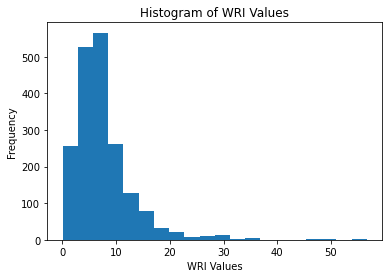

In [ ]:
plt.hist(data['WRI'], bins=20)
plt.xlabel("WRI Values")
plt.ylabel("Frequency")
plt.title("Histogram of WRI Values")
plt.show()

The histogram shows the distribution of WRI values to number of times they occur in the data. Obviously the values between 0 to 16 or thereabout mostly occured for the WRI

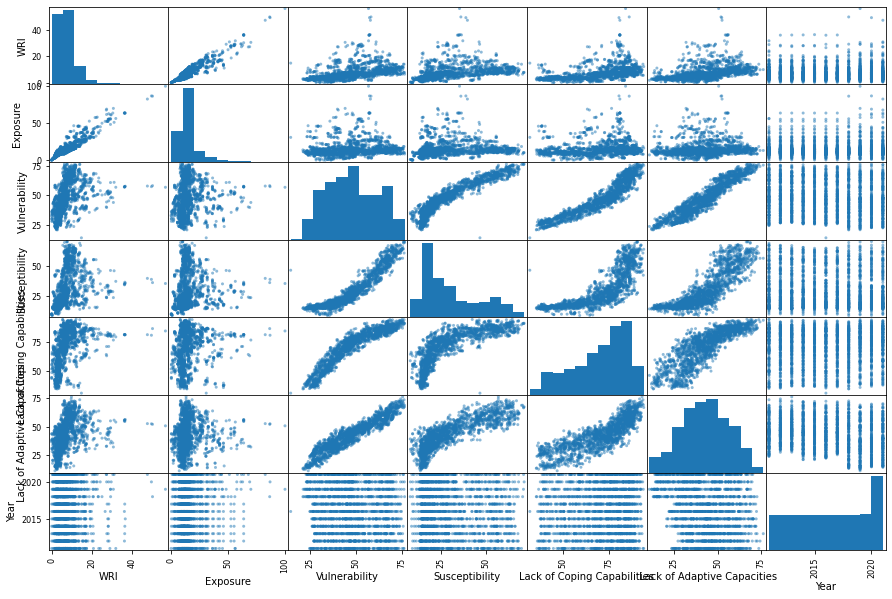

In [ ]:
pd.plotting.scatter_matrix(data.iloc[:,1:], figsize=(15,10))
plt.show()

Although the scatter plot may not be given much useful infomation, but it nice to graphically see the distribution of each variables against themselves.

Some of the features in the data are non-numeric, and can not be used to model the linear regression. Although the categorical dataset can be encoded/transform into numbers or binary. I made this attempt but when I evaluate the model, the performance was poor, therefore I decided to remove the unneccessary colums before building the model.

In [ ]:
# Drop columns that are not needed
data.drop(['Region','Year', 'Exposure Category', 'WRI Category', 'Vulnerability Category','Susceptibility Category'], axis=1, inplace=True)


It is also important to investigate the correlation between each features using heatmap.

The heatmap uses the coolwarm colormap, the warm colors (red, orange, yellow) represent positive correlation, while the cool colors (blue, green) represent negative correlation. The brighter the color, the stronger the correlation. In the heatmap, the correlation values are also indicated by the numeric annotations. In additio, the strong correlation or the number shows the degree at which the two variable affects eachother. An increase/decrease in a variable leads to increase/decrease of the other.

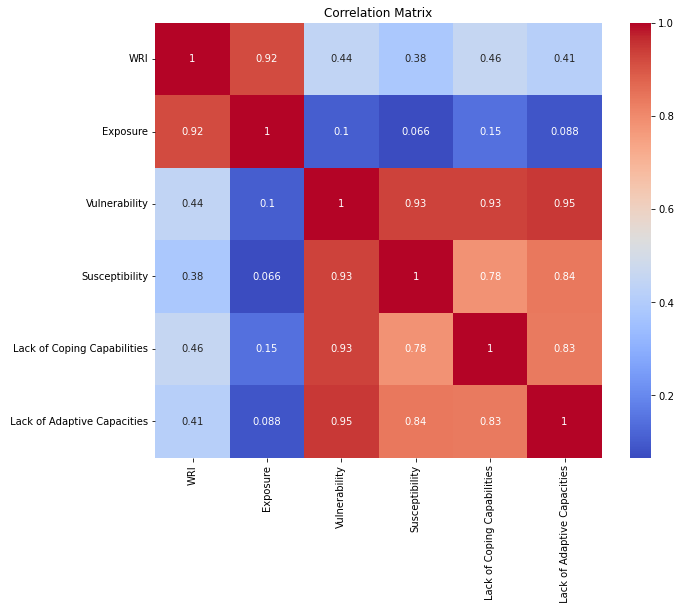

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

#### More data preprocessing!

It is important to also check for other errors that may affect the model apart from removing the non-numeric data, one of which is null value. First I checked if any of the columns has an empty values. If there is, I will remove the rows that have the empty value.

In [ ]:
# Check for missing values
print(data.isnull().sum())

WRI                             0
Exposure                        0
Vulnerability                   0
Susceptibility                  0
Lack of Coping Capabilities     0
 Lack of Adaptive Capacities    1
dtype: int64


It appears that lack of adaptive capacities have one missing value. The next code remove the row and check for the missing value again to ensure its done.

In [ ]:
# Drop rows that have missing values
data = data.dropna()

# Check for missing values again
print(data.isnull().sum())

WRI                             0
Exposure                        0
Vulnerability                   0
Susceptibility                  0
Lack of Coping Capabilities     0
 Lack of Adaptive Capacities    0
dtype: int64


After dropping the non useful colums, I will like to see what my data looks like now by printing the first 5 rows.

In [ ]:
data.head(5)

,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities
0,32.00,56.33,56.81,37.14,79.34,53.96
1,29.08,56.04,51.90,28.94,81.80,44.97
2,24.32,45.09,53.93,34.99,82.78,44.01
3,23.51,36.40,64.60,44.11,85.95,63.74
4,20.88,38.42,54.35,35.36,77.83,49.87


### Preparing to build the regression model

1.  I splitted the dataset into input and target variables: Input variables are the factors consider to determine the output variable. In this case, my input variables are Exposure, Vulnerability, Susceptibility, Lack of Coping Capabilities, and Lack of Adaptive Capacities. Target variable is the feature to be predicted using the input variables. In this case my target variable is WRI.

2. I splitted the dataset into training and test dataset in to 80% and 20% respectively. The previous will be used to train the model, while the later will be used to test the model trained.

3. The linear regression was created and fit to the training data.

In [ ]:
# Split the data into input and target variables
X = data.iloc[:, [1, 2, 3, 4, 5]].values   # select columns 1, 2, 3, 4, 5 as input variables
y = data.iloc[:, 0].values     # select column 1 (WRI) as the target variable

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Create and fit the model to the training data
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Obtaining the evaluation metrics. The evaluation metrics that is mostly used to evaluate the linear regression model are: Mean Squared Error (MSE) and R-squared (R2) Score. While there is no perfect/good value for MSE, the lower the value the better, and 0 means the model is perfect. for the R2, the closer to 1 the better the model.

The two evaluation metrics shows that the performance of the model is very good. Several methods can be employed to improve a model performance but I do not need to do this at this time.

In [ ]:
# Predict the target variable for the test set
y_pred = regressor.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE): ", mse)
print("R-squared (R2) Score: ", r2)

Mean Squared Error (MSE):  1.2996301694817272
R-squared (R2) Score:  0.9555117515515286


Other possible evaluation metrics are shown below.

In [ ]:
# Import the required libraries
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Predict the target variable for the test set
y_pred = regressor.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE): ", mse)
print("Mean Absolute Error (MAE): ", mae)
print("Root Mean Squared Error (RMSE): ", rmse)
print("R-squared (R2) Score: ", r2)

Mean Squared Error (MSE):  1.2996301694817272
Mean Absolute Error (MAE):  0.6490269271516618
Root Mean Squared Error (RMSE):  1.140013232152034
R-squared (R2) Score:  0.9555117515515286


Now I want to visualise the values that was predicted against the actual value.

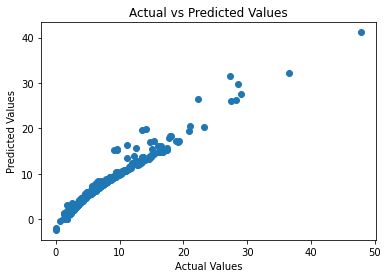

In [ ]:
# Plot the predicted values against the actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

The output was not intuitive, as it is difficult to differenciate the actual from the predicted, therefore I replotted it using different colors for the two values.

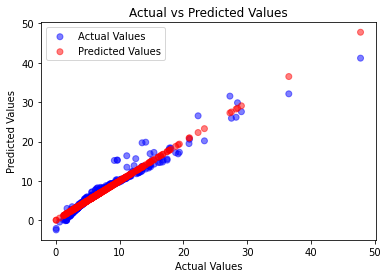

In [ ]:
# Plot the predicted values against the actual values
plt.scatter(y_test, y_pred, c=['blue']*len(y_test), alpha=0.5, label='Actual Values')
plt.scatter(y_test, y_test, c=['red']*len(y_test), alpha=0.5, label='Predicted Values')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()

Here is where I obtained the coefficients that I talked about earlier. The coefficient score gives insight on the features that impacts the WRI values, either negatively or positively.

In [ ]:
# Obtain the coefficients of the model
coefficients = pd.DataFrame({'Variable': data.columns[1:], 'Coefficient': regressor.coef_.ravel()})
coefficients = coefficients.append({'Variable': 'Intercept', 'Coefficient': regressor.intercept_}, ignore_index=True)
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
coefficients['Variable'] = coefficients['Variable'].to_numpy()  # convert index to numpy array
print(coefficients)


                       Variable           Coefficient
1                 Vulnerability             90.722397
5                     Intercept  [7.5373107049600225]
0                      Exposure              4.908667
4   Lack of Adaptive Capacities            -28.729322
3   Lack of Coping Capabilities            -32.108038
2                Susceptibility            -33.830001


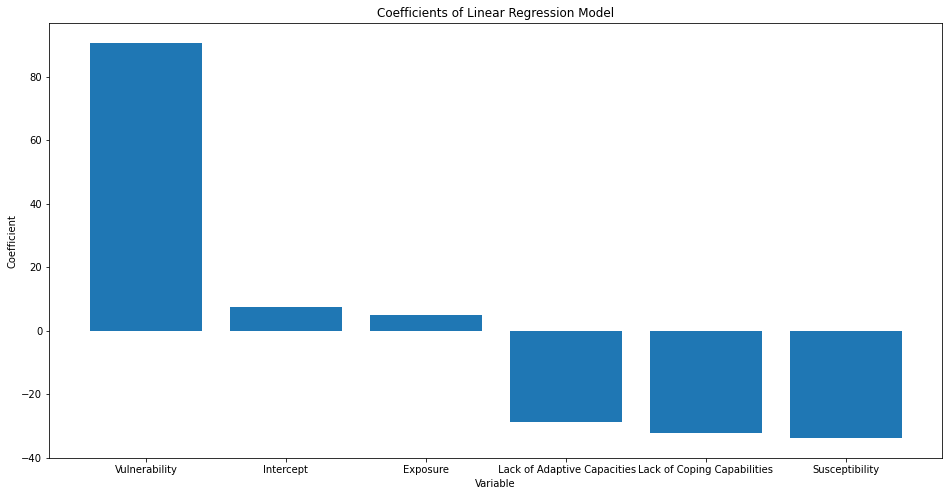

In [ ]:
# Create a bar chart of the coefficients
plt.figure(figsize=(16,8))
plt.bar(coefficients['Variable'], coefficients['Coefficient'])

# Add labels and title
plt.xlabel('Variable')
plt.ylabel('Coefficient')
plt.title('Coefficients of Linear Regression Model')

# Show the plot
plt.show()


### More interpretation of the variable coefficients

Intercept: This represents the constant term in the model. In this case, the intercept value is 7.54, which means that if all other variables are equal to zero, the predicted value of the dependent variable is 7.54. This is rhyme with the histogram that we plot in the begining, the highest value is found within the range of 7.54 and could also be termed as average value.

Vulnerability: This coefficient has a value of 90.72, which means that a one-unit increase in vulnerability leads to an increase in the predicted value of the dependent variable by 90.72 units, holding all other variables constant.

Exposure: This coefficient has a value of 4.91, which means that a one-unit increase in exposure leads to an increase in the predicted value of the dependent variable by 4.91 units, holding all other variables constant.

Susceptibility: This coefficient has a value of -33.83, which means that a one-unit increase in susceptibility leads to a decrease in the predicted value of the dependent variable by 33.83 units, holding all other variables constant.

Lack of Coping Capabilities: This coefficient has a value of -32.11, which means that a one-unit increase in lack of coping capabilities leads to a decrease in the predicted value of the dependent variable by 32.11 units, holding all other variables constant.

Lack of Adaptive Capacities: This coefficient has a value of -28.73, which means that a one-unit increase in lack of adaptive capacities leads to a decrease in the predicted value of the dependent variable by 28.73 units, holding all other variables constant.

In summary, a positive coefficient indicates that an increase in the corresponding independent variable leads to an increase in the predicted value of the dependent variable, while a negative coefficient indicates that an increase in the corresponding independent variable leads to a decrease in the predicted value of the dependent variable, holding all other variables constant.